# Introduction to 'missing data' problem
In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

- A common problem in scientific research.
- Lack of standardized approach for handling missing.
- Reduction of study's power and sample size.
- Risk of irreproducibility in analysis.

# Types of Missing Data:
### MCAR: Missing Completely At Random
* Missing data are not related to observed and unobserved data.
* Missing data variable is a random sample of all data.
* D1, D2, D3 are not related with any other variables.
* Example: biosamples for genotyping, race, sex, age group, educational levels, etc are not related to D1, D2, D3.

### MAR: Missing At Random
* Missing data are systematically related to the observeed but not the unobserved variables.
* Missing data can be predicted from other variables in the study.
* Example: Employees in the service industry are reluctant to answer questions about income.

### MNAR: Missing Not At Random
* Not MAR.
* It is a 'complicated business'.
* Missing values are unrelated of any unobseved data (response variable and covariantes).
* Probability of missing data is dependent on the **missing data values** it self.
* Example: reason for drug usage.

# What to do with missing data?
* Checking data, collecting more data.
* Removing missing values.
* Replacing by 'likely values':
    * mean, median, etc.
    * statistical function
### Problem of removing missing data
* One single missing value leads to the removal of the entire row of data.
* Very inefficient: reduced power.
* Biased estimates (in longitudinal data).

### Problem of replacing by mean
* Mean is a weak estimate.
* Bias: reduced variance.
* Reduced effect size
* Increased effect size (for missing data variables)
* Reduced $R^2$.
### Problem of statistical function in missing value
* Regression based models.
* Predicted values do not provide more information (from what already in the model).
* Lack of uncertainty of predicted values:
    * $R^2$ = 0.90 -> good predicted values
    * $R^2$ = 0.10 -> noisy predicted values

# Modern method: imputation
* Multiple imputation (MI) assumed MAR.
* Imputation 5-20 times.
* Based on models, and parameters are repeatedly estimated (5-20 times).
* Average of all parameters.
* Take into account variance.

### Multiple Imputaion Method
* Assuming missing at random (MAR).
* Creating multiple datasets from the original dataset.
* Estimating parameters of a model for each dataset.
* Taking average of the estimated parameters.

##### Estimation of missing data 
* Taking randomly from imputed datasets
    * Only valid under MAR or MCAR
* Using Propensity Score method
    * Logistic model to estimate the probability of missing values.
    * Selecting the one with the highest probability.

# Introduction to mice

# Analysis of missing data
### Step 1: Checking data and visualization

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Hawks.csv"
hawks = pd.read_csv(url, index_col=0)

Visualizing Missing Data using Seaborn heatmap()

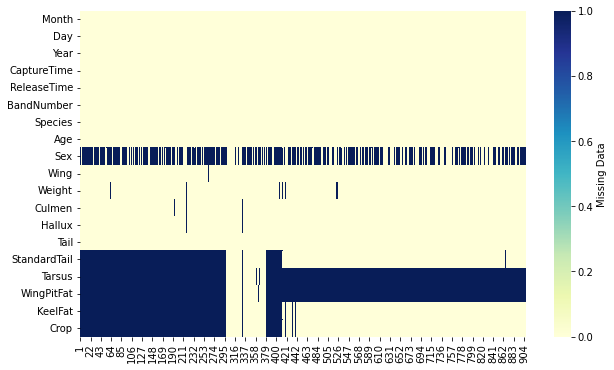

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(hawks.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

Visualizing Missing Data using Seaborn displot()

<Figure size 720x432 with 0 Axes>

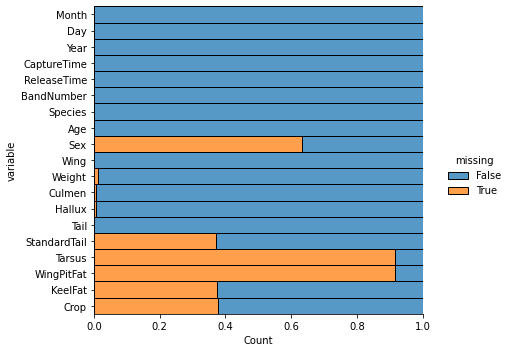

In [4]:
plt.figure(figsize=(10,6))
sns.displot(
    data=hawks.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

### Step 2: Imputation of missing values
[Univariate feature imputation](https://scikit-learn.org/stable/modules/impute.html#univariate-feature-imputation)

In [14]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
imp


SimpleImputer()

In [15]:
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


The SimpleImputer class also supports sparse matrices:

In [16]:
import scipy.sparse as sp
X = sp.csc_matrix([[1, 2], [0, -1], [8, 4]])
imp = SimpleImputer(missing_values=-1, strategy='mean')
imp.fit(X)

SimpleImputer(missing_values=-1)

In [17]:
X_test = sp.csc_matrix([[-1, 2], [6, -1], [7, 6]])
print(imp.transform(X_test).toarray())

[[3. 2.]
 [6. 3.]
 [7. 6.]]


The SimpleImputer class also supports categorical data represented as string values or pandas categoricals when using the `'most_frequent'` or `'constant'` strategy:

In [21]:
df = pd.DataFrame([["a", "x"],
                [np.nan, "y"],
                ["a", np.nan],
                ["b", "y"]], dtype="category")
imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


[Multivariate feature imputation](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation)

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])

IterativeImputer(random_state=0)

In [23]:
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]    
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


[Flexibility of IterativeImputer](https://scikit-learn.org/stable/modules/impute.html#flexibility-of-iterativeimputer)

There are many well-established imputation packages in the R data science ecosystem: Amelia, mi, mice, missForest, etc. missForest is popular, and turns out to be a particular instance of different sequential imputation algorithms that can all be implemented with IterativeImputer by passing in different regressors to be used for predicting missing feature values. In the case of missForest, this regressor is a Random Forest.

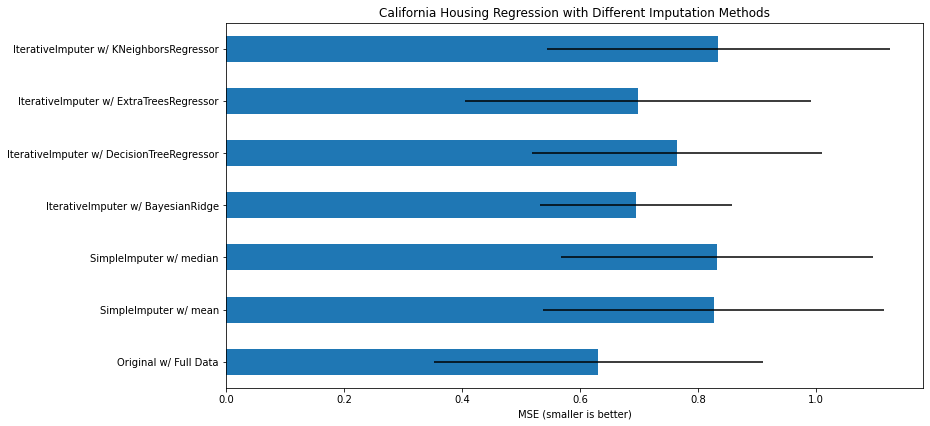

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

N_SPLITS = 5

rng = np.random.RandomState(0)

X_full, y_full = fetch_california_housing(return_X_y=True)
# ~2k samples is enough for the purpose of the example.
# Remove the following two lines for a slower run with different error bars.
X_full = X_full[::10]
y_full = y_full[::10]
n_samples, n_features = X_full.shape

# Estimate the score on the entire dataset, with no missing values
br_estimator = BayesianRidge()
score_full_data = pd.DataFrame(
    cross_val_score(
        br_estimator, X_full, y_full, scoring="neg_mean_squared_error", cv=N_SPLITS
    ),
    columns=["Full Data"],
)

# Add a single missing value to each row
X_missing = X_full.copy()
y_missing = y_full
missing_samples = np.arange(n_samples)
missing_features = rng.choice(n_features, n_samples, replace=True)
X_missing[missing_samples, missing_features] = np.nan

# Estimate the score after imputation (mean and median strategies)
score_simple_imputer = pd.DataFrame()
for strategy in ("mean", "median"):
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy), br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=N_SPLITS
    )

# Estimate the score after iterative imputation of the missing values
# with different estimators
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features="sqrt", random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15),
]
score_iterative_imputer = pd.DataFrame()
for impute_estimator in estimators:
    estimator = make_pipeline(
        IterativeImputer(random_state=0, estimator=impute_estimator), br_estimator
    )
    score_iterative_imputer[impute_estimator.__class__.__name__] = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=N_SPLITS
    )

scores = pd.concat(
    [score_full_data, score_simple_imputer, score_iterative_imputer],
    keys=["Original", "SimpleImputer", "IterativeImputer"],
    axis=1,
)

# plot california housing results
fig, ax = plt.subplots(figsize=(13, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title("California Housing Regression with Different Imputation Methods")
ax.set_xlabel("MSE (smaller is better)")
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.tolist()])
plt.tight_layout(pad=1)
plt.show()

[Nearest neighbors imputation](https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation)

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. 

In [25]:
from sklearn.impute import KNNImputer
nan = np.nan
X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

[Marking imputed values](https://scikit-learn.org/stable/modules/impute.html#marking-imputed-values)

The MissingIndicator transformer is useful to transform a dataset into corresponding binary matrix indicating the presence of missing values in the dataset. This transformation is useful in conjunction with imputation. When using imputation, preserving the information about which values had been missing can be informative.

In [26]:
from sklearn.impute import MissingIndicator
X = np.array([[-1, -1, 1, 3], \
    [4, -1, 0, -1], 
    [8, -1, 1, 0]])
indicator = MissingIndicator(missing_values=-1)
mask_missing_values_only = indicator.fit_transform(X)
mask_missing_values_only

array([[ True,  True, False],
       [False,  True,  True],
       [False,  True, False]])

The features parameter is used to choose the features for which the mask is constructed. By default, it is `'missing-only'` which returns the imputer mask of the features containing missing values at fit time:

In [27]:
indicator.features_

array([0, 1, 3])

The features parameter can be set to `'all'` to return all features whether or not they contain missing values:

In [28]:
indicator = MissingIndicator(missing_values=-1, features="all")
mask_all = indicator.fit_transform(X)
mask_all

array([[ True,  True, False, False],
       [False,  True, False,  True],
       [False,  True, False, False]])

In [29]:
indicator.features_

array([0, 1, 2, 3])

When using the MissingIndicator in a Pipeline, be sure to use the FeatureUnion or ColumnTransformer to add the indicator features to the regular features.

In [30]:
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier
X, y = load_iris(return_X_y=True)
mask = np.random.randint(0, 2, size=X.shape).astype(bool)
X[mask] = np.nan
X_train, X_test, y_train, _ = train_test_split(X, y, test_size=100, \
    random_state=0)

All features will be imputed using SimpleImputer, in order to enable classifiers to work with this data. Additionally, it adds the indicator variables from MissingIndicator.

In [31]:
transformer = FeatureUnion(
    transformer_list=[
        ('features', SimpleImputer(strategy='mean')),
        ('indicators', MissingIndicator())])
transformer = transformer.fit(X_train, y_train)
results = transformer.transform(X_test)
results.shape

(100, 8)

In [32]:
clf = make_pipeline(transformer, DecisionTreeClassifier())
clf = clf.fit(X_train, y_train)
results = clf.predict(X_test)
results.shape

(100,)